<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/autoAsocjator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

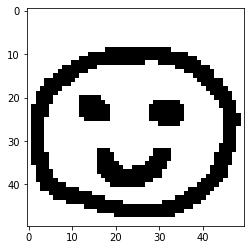

In [26]:
# Auto asocjator

import keras.preprocessing.image as kpi
from matplotlib import pyplot as plt
import numpy as np

def show_image(img):
  """Show 2D image from NumPy array"""
  plt.imshow(img, cmap="gray")

def get_images():
  filenames = ['car.png', 'face.png', 'flower.png', 'mush.png', 'sun.png']
  images = np.array([])
  for filename in filenames:
    image = kpi.load_img(filename)  # Load image as NumPy array
    images = np.append(images, kpi.img_to_array(image)[:, :, 0])  # Only R canal
  images = images.reshape(5, 50, 50)  # 5 pictures 50pxx50px
  images /= 255.0  # Array values 0-1
  return images


if __name__ == "__main__":

  images = get_images()
  show_image(images[1])
